# Question 1.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.DataFrame({'month':[i for i in range(1,13)],
                  'max_temp':[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25],
                  'min_temp':[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18],})
df

,month,max_temp,min_temp
0,1,39,21
1,2,41,23
2,3,43,27
3,4,47,28
4,5,49,32
5,6,51,35
6,7,45,31
7,8,38,28
8,9,37,21
9,10,29,19


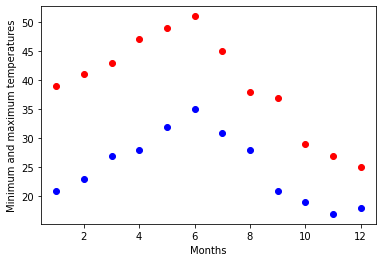

In [6]:
plt.scatter(df.month, df.max_temp, color='red')
plt.scatter(df.month, df.min_temp, color='blue')
plt.xlabel('Months')
plt.ylabel('Minimum and maximum temperatures')
plt.show()

In [7]:
# Fitting it to a periodic function
from scipy import optimize

In [13]:

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, df.month, df.max_temp)
res_min, cov_min = optimize.curve_fit(yearly_temps, df.month, df.min_temp)

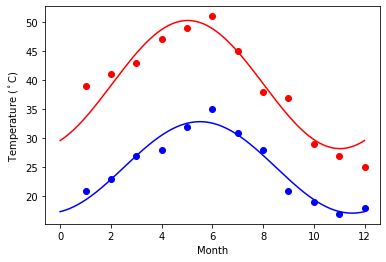

In [14]:
days = np.linspace(0, 12, num =365)
plt.figure()
plt.scatter(df.month, df.max_temp, color='red')
plt.plot(days, yearly_temps(days, *res_max), color = 'red')
plt.scatter(df.month, df.min_temp, color='blue')
plt.plot(days, yearly_temps(days, *res_min), color = 'blue')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

# Question 1.2 (a)

In [15]:
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
titanic.shape

(1310, 14)

In [18]:
titanic.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [33]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [22]:
titanic1 = titanic[titanic.dtypes[titanic.dtypes == 'object'].index]
titanic1

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...
1305,"Zabour, Miss. Thamine",female,2665,NaN,C,NaN,NaN
1306,"Zakarian, Mr. Mapriededer",male,2656,NaN,C,NaN,NaN
1307,"Zakarian, Mr. Ortin",male,2670,NaN,C,NaN,NaN
1308,"Zimmerman, Mr. Leo",male,315082,NaN,S,NaN,NaN


In [23]:
titanic1.describe()

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [25]:
titanic1.sex.unique()

array(['female', 'male', nan], dtype=object)

In [26]:
titanic1.dropna(subset=["sex"], inplace = True)

<ipython-input-26-4469d5a1453d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic1.dropna(subset=["sex"], inplace = True)


In [27]:
titanic1.sex.unique()

array(['female', 'male'], dtype=object)

In [28]:
titanic1.groupby('sex').size()

sex
female    466
male      843
dtype: int64

<AxesSubplot:ylabel='Male/Female Proportion'>

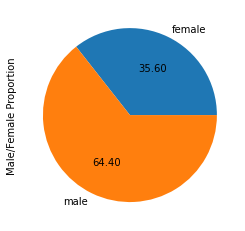

In [32]:
titanic1.groupby('sex').size().plot(kind='pie', autopct='%0.2f',ylabel='Male/Female Proportion')

# Question 1.2 (b)

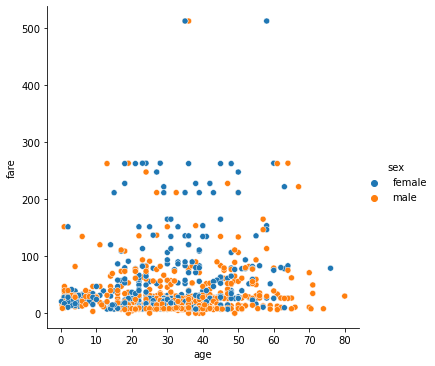

In [40]:
sns.relplot(x='age', y='fare', hue ='sex', data=titanic)